In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("drive/My Drive/DSN Hackathon/Train.csv")
test  = pd.read_csv("drive/My Drive/DSN Hackathon/Test.csv")
sub = pd.read_csv("drive/My Drive/DSN Hackathon/SampleSubmission.csv")

In [ ]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [ ]:
len(train), len(test)

(56000, 24000)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

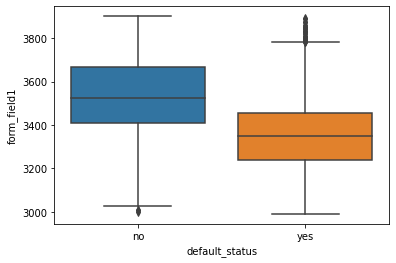

In [ ]:
sns.boxplot('default_status', 'form_field1', data=train);

In [ ]:
train['form_field47'].value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

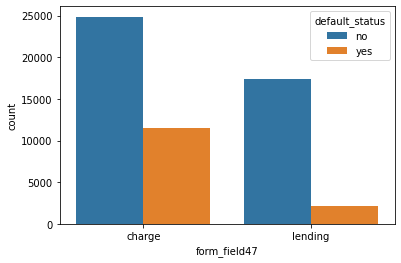

In [ ]:
sns.countplot('form_field47',data=train,hue='default_status');

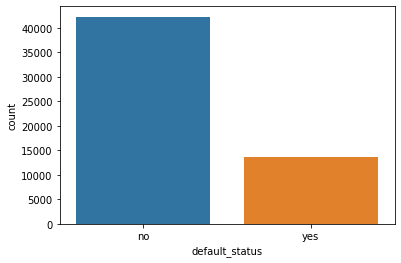

In [ ]:
sns.countplot('default_status',data=train);

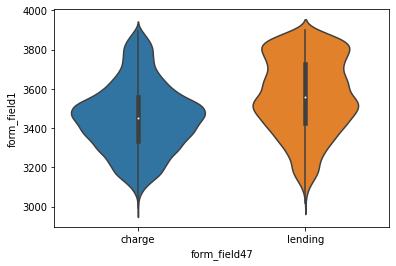

In [ ]:
sns.violinplot('form_field47','form_field1',data=train);

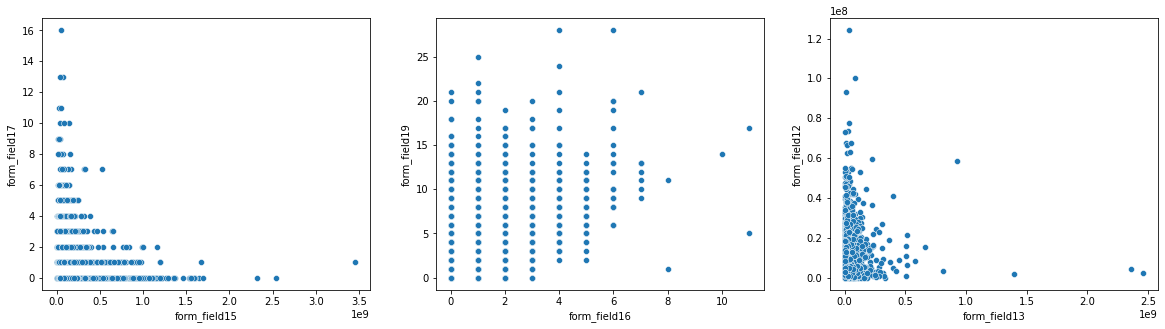

In [ ]:
fig,ax = plt.subplots(figsize=(20,5),ncols=3,nrows=1)
sns.scatterplot('form_field15','form_field17',data=train,ax=ax[0])
sns.scatterplot('form_field16','form_field19',data=train,ax=ax[1])
sns.scatterplot('form_field13','form_field12',data=train,ax=ax[2]);

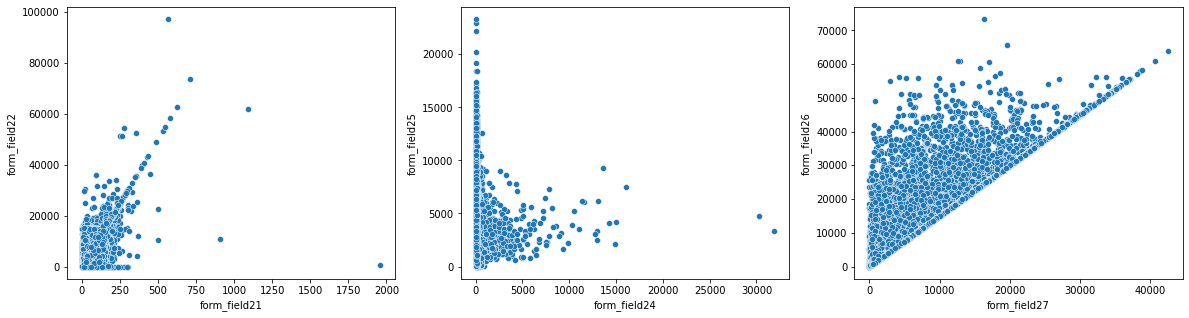

In [ ]:
fig,ax = plt.subplots(figsize=(20,5),ncols=3,nrows=1)
sns.scatterplot('form_field21','form_field22',data=train,ax=ax[0])
sns.scatterplot('form_field24','form_field25',data=train,ax=ax[1])
sns.scatterplot('form_field27','form_field26',data=train,ax=ax[2]);

In [ ]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [ ]:
train.nunique()

Applicant_ID      56000
form_field1         449
form_field2       20015
form_field3       14617
form_field4        2927
form_field5        2991
form_field6        5846
form_field7       23199
form_field8       12820
form_field9       22650
form_field10      30942
form_field11       9508
form_field12      16778
form_field13      21960
form_field14       1237
form_field15      23783
form_field16         11
form_field17         15
form_field18         16
form_field19         26
form_field20         27
form_field21      11101
form_field22      23583
form_field23      16619
form_field24      12571
form_field25       5014
form_field26        594
form_field27        558
form_field28         95
form_field29        654
form_field30        274
form_field31        394
form_field32       2620
form_field33        554
form_field34         18
form_field35         11
form_field36         66
form_field37         52
form_field38         58
form_field39         15
form_field40       9848
form_field41    

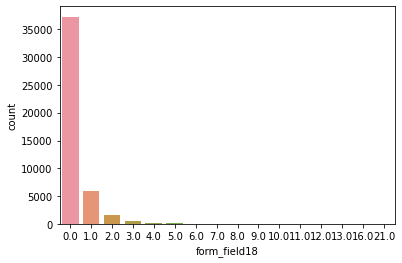

In [ ]:
sns.countplot('form_field18',data=train);

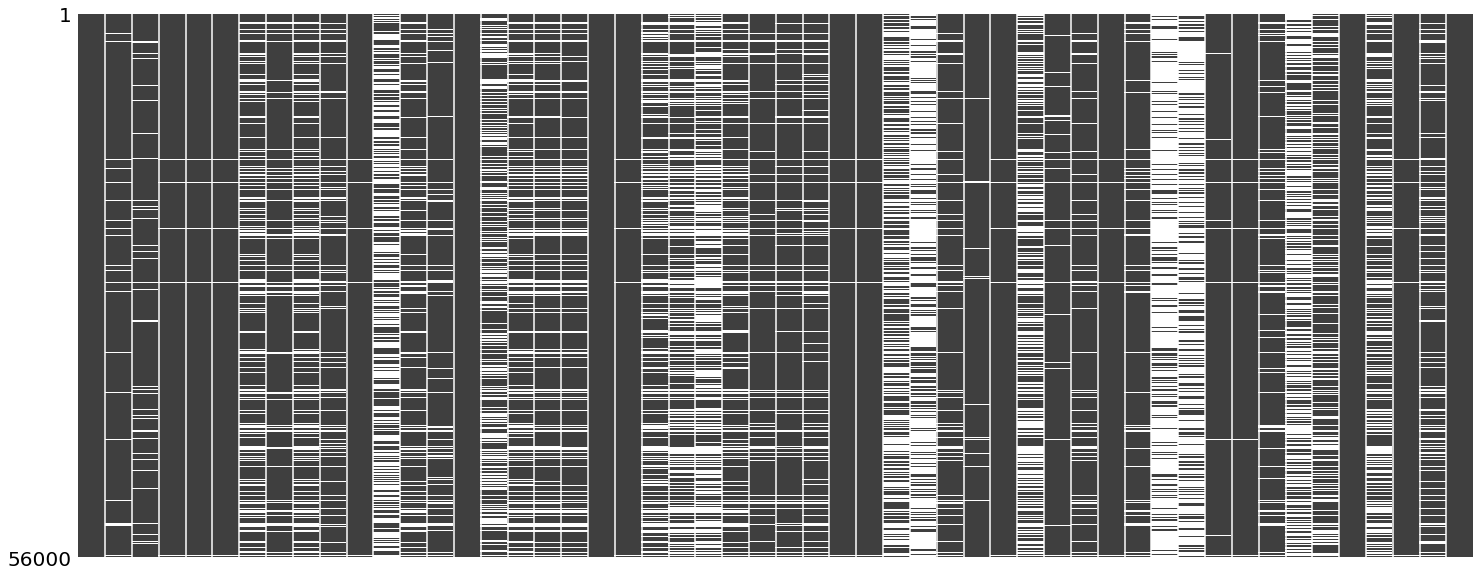

In [ ]:
mno.matrix(train,sparkline=False);

In [ ]:

targett = {'yes' : 1,
             'no' : 0}
train['default_status'].replace(targett, inplace = True)

train['form_field47'].replace({'charge': 1,'lending': 0},inplace=True)
test['form_field47'].replace({'charge': 1,'lending': 0},inplace=True)

In [ ]:


train.drop('form_field49', inplace=True, axis=1)
test.drop('form_field49', inplace=True, axis=1)
train.drop('form_field50', inplace=True, axis=1)
test.drop('form_field50', inplace=True, axis=1)



In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 45kB/s 


In [ ]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from catboost import CatBoost


In [ ]:
features = train.select_dtypes(exclude = object).columns.drop(['default_status'])

In [ ]:
for col in features:
    train[col].fillna(-999, inplace = True)
    test[col].fillna(-999, inplace = True)

In [ ]:
X = train[features]
y = train['default_status']

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
def metric(y, pred):
    return roc_auc_score(y, pred, labels=[0, 1])

In [ ]:
# Specify number of folds
n_skf = 10
kf = StratifiedKFold(n_skf)


seed = 2020

## Manually tweak the hyperparameter, learning rate and n_estimators especially for CatBoost
params = {
    'n_estimators': 4000,
    'learning_rate': 0.01,
    'max_depth': 8,
    'task_type': 'GPU',
    'objective': 'CrossEntropy',
      'eval_metric':'AUC',
    'random_seed': seed,
    'early_stopping_rounds': 200,
    'use_best_model': True,
}

In [ ]:
#For Catboost
score_list = []
score = 0
test_oofs = []

for i, (tr_idx, vr_idx) in enumerate(kf.split(X, y)):
    
    xtrain, ytrain = X.loc[tr_idx, features], y.loc[tr_idx]
    xval, yval = X.loc[vr_idx, features], y.loc[vr_idx]

    model = CatBoostClassifier(**params)
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], verbose=100)
    
    p = model.predict_proba(xval)[:, 1]
    sc = metric(yval, p)
    score_list.append(sc)
    score += sc/n_skf
    
    pred = model.predict_proba(test[features])[:, 1]
    test_oofs.append(pred)

    print('Fold {} : {}'.format(i, sc))

print()
print()
print('Avg log : ', score)

0:	learn: 0.8070262	test: 0.7933607	best: 0.7933607 (0)	total: 29.7ms	remaining: 1m 58s
100:	learn: 0.8377990	test: 0.8200252	best: 0.8200607 (99)	total: 2.02s	remaining: 1m 17s
200:	learn: 0.8442058	test: 0.8237080	best: 0.8237080 (200)	total: 3.87s	remaining: 1m 13s
300:	learn: 0.8489701	test: 0.8259493	best: 0.8259493 (300)	total: 5.7s	remaining: 1m 10s
400:	learn: 0.8532155	test: 0.8270336	best: 0.8270336 (400)	total: 7.49s	remaining: 1m 7s
500:	learn: 0.8569413	test: 0.8282089	best: 0.8282151 (499)	total: 9.28s	remaining: 1m 4s
600:	learn: 0.8605709	test: 0.8290067	best: 0.8290067 (600)	total: 11.1s	remaining: 1m 2s
700:	learn: 0.8638196	test: 0.8296640	best: 0.8296640 (700)	total: 12.9s	remaining: 1m
800:	learn: 0.8668092	test: 0.8301425	best: 0.8301425 (800)	total: 14.7s	remaining: 58.8s
900:	learn: 0.8697754	test: 0.8304842	best: 0.8304843 (898)	total: 16.6s	remaining: 56.9s
1000:	learn: 0.8727824	test: 0.8309290	best: 0.8309367 (999)	total: 18.4s	remaining: 55.1s
1100:	learn: 

In [ ]:
oof_prediction = pd.DataFrame(test_oofs).T

In [ ]:
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, n_skf + 1)]

In [ ]:
oof_prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,0.299736,0.288646,0.326799,0.323203,0.304760,0.357184,0.315901,0.319597,0.309746,0.304298
1,0.417604,0.388070,0.352239,0.389679,0.469140,0.402850,0.413806,0.351022,0.419880,0.356859
2,0.345610,0.403495,0.418566,0.404455,0.406721,0.415533,0.400497,0.383108,0.343498,0.384847
3,0.721626,0.772540,0.782533,0.762032,0.756489,0.779461,0.787822,0.754869,0.746729,0.755214
4,0.139619,0.130798,0.157060,0.139168,0.169071,0.179541,0.155792,0.148486,0.187570,0.142759


In [ ]:
sub['default_status'] = np.mean(test_oofs, axis = 0) 

In [ ]:
sub.to_csv("drive/My Drive/DSN Hackathon/officialsubmit.csv", index = False)